# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

# Visiting the URL
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Extracting the html from the browser URL  
html = browser.html

# Create a Beautiful Soup Object
soup = BeautifulSoup(html, "html.parser")

In [5]:
# Extract all rows of data
table_content = soup.find_all('table', class_ ='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
headers = []
records = []
for rows in table_content:
    
    for idx, header in enumerate(soup.findChildren('th')):
        headers.append(header.text)
    
    for idx, row in enumerate(soup.findChildren('td')):
        records.append(row.text)
    
df = pd.DataFrame(
    data = np.array(records).reshape(int(len(records)/7), 7),
    columns=headers)

In [7]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [8]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [9]:
# Change data types for data analysis
df = df.astype({'id': 'Int16',
           'terrestrial_date': 'datetime64',
            'sol': 'Int16', 
            'ls': 'Int16', 
            'month': 'Int8', 
            'min_temp': 'float32',
            'pressure': 'float32'})
df.dtypes

id                           Int16
terrestrial_date    datetime64[ns]
sol                          Int16
ls                           Int16
month                         Int8
min_temp                   float32
pressure                   float32
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [10]:
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [11]:
# 1. How many months are there on Mars?
df['month'].value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: Int64

In [12]:
# 2. How many Martian days' worth of data are there?
df['sol'].nunique()

1867

In [13]:
# 3. What is the average low temperature by month?
df.groupby('month')['min_temp'].mean()

month
1    -77.160919
2    -79.932587
3    -83.307289
4    -82.747421
5    -79.308723
6    -75.299316
7    -72.281693
8    -68.382980
9    -69.171638
10   -71.982140
11   -71.985504
12   -74.451805
Name: min_temp, dtype: float32

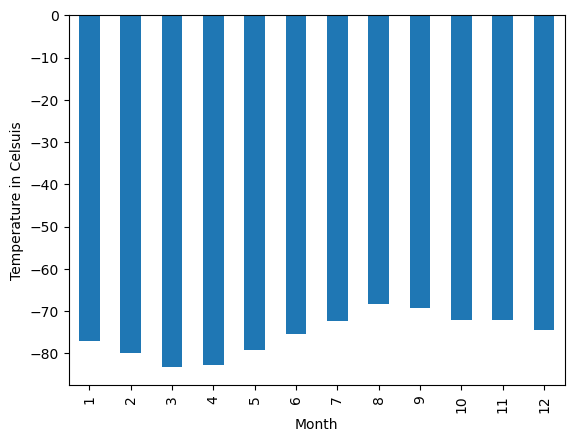

In [63]:
# Plot the average temperature by month
df.groupby('month')['min_temp'].mean().plot.bar(xlabel='Month', ylabel='Temperature in Celsuis')

plt.savefig("/Users/galbeeir/Desktop/git/web_scapping/mars_scapping/Images/Fig_1.png")

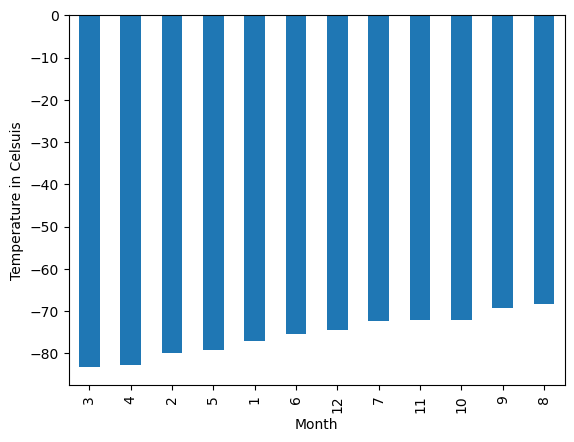

In [64]:
# Identify the coldest and hottest months in Curiosity's location
(df
 .groupby('month')['min_temp']
 .mean()
 .sort_values()
 .plot
 .bar(xlabel='Month', ylabel='Temperature in Celsuis'))

plt.savefig("/Users/galbeeir/Desktop/git/web_scapping/mars_scapping/Images/Fig_2.png")

In [16]:
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [17]:
# 4. Average pressure by Martian month
df.groupby('month')['pressure'].mean()

month
1     862.488525
2     889.455078
3     877.322937
4     806.329895
5     748.557068
6     745.054443
7     795.105652
8     873.829773
9     913.305969
10    887.312500
11    857.014465
12    842.156616
Name: pressure, dtype: float32

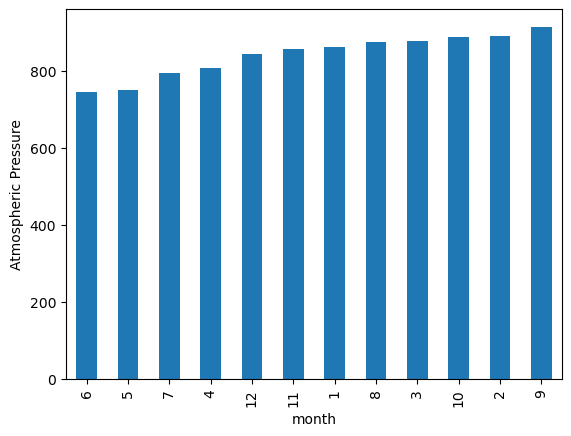

In [65]:
# Plot the average pressure by month
df.groupby('month')['pressure'].mean().sort_values().plot.bar(xlabel='month', ylabel='Atmospheric Pressure')

plt.savefig("/Users/galbeeir/Desktop/git/web_scapping/mars_scapping/Images/Fig_3.png")

In [40]:
 # 5. How many terrestrial (earth) days are there in a Martian year?
df['year'] = df['terrestrial_date'].dt.year

# * Filtered df with month that is equal to 1
month_1 = df.loc[df['month'] == 1][['year','month', 'sol']]

# * Filtered df with month that is equal to 12
month_2 = df.loc[df['month'] == 12][['year','month', 'sol']]

In [62]:
# Extracting the min and max values for both DFs
years_month_1 = month_1.groupby('year')[['sol']].min()
years_month_2 = month_2.groupby('year')[['sol']].max()

# * Merging year_month_1 and year_month_2 to calculate how many terrestrial days are there in a Martian year
star_end_years = pd.merge(
    left= years_month_1,
    right= years_month_2,
    on = 'year'
).rename(columns={'sol_x': 'sol_min', 'sol_y': 'sol_max'})

# * First year - terrestrial days
first_year_dif = star_end_years['sol_max'].iloc[1]-star_end_years['sol_min'].iloc[0]

# * Second year - terrestrial dayas
second_year_dif = star_end_years['sol_max'].iloc[2]-star_end_years['sol_min'].iloc[1]

In [60]:
first_year_dif

667

In [59]:
second_year_dif

668

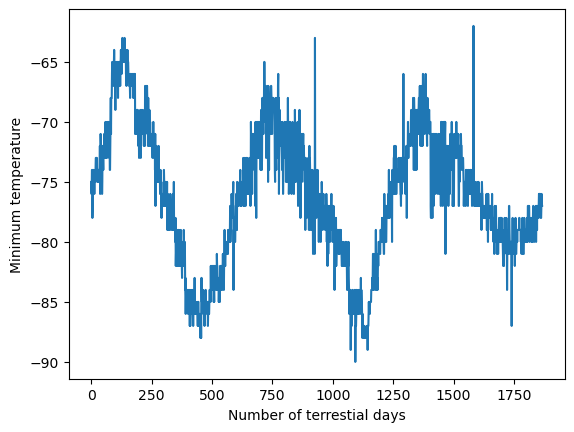

In [66]:
# 5. How many terrestrial (earth) days are there in a Martian year? - Visual Representation
df.groupby(df['terrestrial_date'].index)['min_temp'].mean().plot(xlabel='Number of terrestial days', ylabel='Minimum temperature');

plt.savefig("/Users/galbeeir/Desktop/git/web_scapping/mars_scapping/Images/Fig_4.png")

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
df.to_csv("/Users/galbeeir/Desktop/git/web_scapping/mars_scapping/output/df.csv")

In [21]:
browser.quit()